# Import modules

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
TRIPS_STATIONS_PATH='/Users/nicolaesse/Documents/Data science/Py/Analisi biciclette Madrid/Trips analysis/Trips_stations.csv'
TRIPS_HOURLY_PATH='/Users/nicolaesse/Documents/Data science/Py/Analisi biciclette Madrid/Trips analysis/Trips_hourly.csv'
STATIONS_PATH='/Users/nicolaesse/Documents/Data science/Py/Analisi biciclette Madrid/Stations analysis/df_stations.csv'

# Import file

In [3]:
df_trip_stations = pd.read_csv(TRIPS_STATIONS_PATH)
df_trip_stations.head()

,unplug_Month,user_type,idplug_station,idunplug_station,count
0,2017-05-01,0,1,1,13
1,2017-05-01,0,1,2,1
2,2017-05-01,0,1,5,1
3,2017-05-01,0,1,13,2
4,2017-05-01,0,1,15,1


In [4]:
df_stations = pd.read_csv(STATIONS_PATH, sep=';', encoding='latin-1')
df_stations.head()

,address,id,latitude,longitude,name,number,total_bases,neighbours
0,Puerta del Sol nº 1,1,40.416896,-3.702425,Puerta del Sol A,1a,24,Centro
1,Puerta del Sol nº 1,2,40.417001,-3.702421,Puerta del Sol B,1b,24,Centro
2,Calle Miguel Moya nº 1,3,40.420589,-3.705842,Miguel Moya,2,24,Centro
3,Plaza del Conde Suchil nº 2-4,4,40.430294,-3.706917,Plaza Conde Suchil,3,18,Chamberí
4,Calle Manuela Malasaña nº 5,5,40.428552,-3.702587,Malasaña,4,24,Centro


In [5]:
df_trips_hourly = pd.read_csv(TRIPS_HOURLY_PATH, sep=',', encoding='latin-1')
df_trips_hourly.head()

,unplug_Day,unplug_Hour,user_type,count
0,2017-05-01,1.0,0.0,39.0
1,2017-05-01,1.0,1.0,126.0
2,2017-05-01,1.0,3.0,29.0
3,2017-05-01,2.0,0.0,18.0
4,2017-05-01,2.0,1.0,109.0


# Exploratory data analysis

In [6]:
# Total number of trips
df_trip_stations['count'].sum()

5478168

In [7]:
df_trip_stations.describe()

,user_type,idplug_station,idunplug_station,count
count,586011.000000,586011.000000,586011.000000,586011.000000
mean,1.188874,87.843836,88.693888,9.348234
std,0.698160,51.643694,51.406950,12.579709
min,0.000000,1.000000,1.000000,1.000000
25%,1.000000,44.000000,45.000000,2.000000
50%,1.000000,88.000000,89.000000,5.000000
75%,1.000000,132.000000,133.000000,12.000000
max,3.000000,2008.000000,2008.000000,266.000000


In [8]:
# Distinct of user_type
df_trip_stations['user_type'].unique()

array([0, 1, 2, 3])

In [9]:
# plug stations not in df_stations
a=df_trip_stations['idplug_station'].unique()
b=df_stations['id'].unique()
set(a) - set(b)

{22, 2008}

In [10]:
# unplug stations not in df_stations
a=df_trip_stations['idunplug_station'].unique()
b=df_stations['id'].unique()
set(a) - set(b)

{22, 2008}

### Station 2008

In [11]:
# Trips with idplug_stations=2008
df_trip_stations.loc[df_trip_stations['idplug_station'] == 2008]

,unplug_Month,user_type,idplug_station,idunplug_station,count
76451,2017-06-01,1,2008,2008,1
81354,2017-06-01,3,2008,2008,2
152803,2017-08-01,3,2008,2008,4
187928,2017-09-01,1,2008,2008,2
194129,2017-09-01,3,2008,2008,4
267229,2017-11-01,1,2008,2008,14
273263,2017-11-01,3,2008,2008,8
299024,2017-12-01,1,2008,2008,3
328541,2018-01-01,1,2008,2008,1
423096,2018-04-01,3,2008,2008,1


In [12]:
# count trips with idplug_stations=2008
df_trip_stations['count'].loc[(df_trip_stations['idplug_station'] == 2008) | (df_trip_stations['idunplug_station'] == 2008)].sum()

42

In [13]:
# Load 201712 usage dataset
data = []

with open('/Users/nicolaesse/Downloads/BiciMad usage/201712_Usage_Bicimad.json', encoding='latin-1') as f:
    for line in f:
        data.append(json.loads(line))

df_routes = pd.DataFrame(data)
df_routes.loc[df_routes['idplug_station'] == 2008]


,_id,ageRange,idplug_base,idplug_station,idunplug_base,idunplug_station,travel_time,unplug_hourTime,user_day_code,user_type,zip_code
2581,{'$oid': '5a300b742f38432284ee7845'},0,1,2008,1,2008,803,{'$date': '2017-12-01T09:00:00.000+0100'},7dfb6e8ca390440579499a9993b3820694cd6d63c08975...,1,
3206,{'$oid': '5a300b772f38432284ee7b67'},0,1,2008,1,2008,2422,{'$date': '2017-12-01T09:00:00.000+0100'},7dfb6e8ca390440579499a9993b3820694cd6d63c08975...,1,
195862,{'$oid': '5a42d7032f384324cc1a8d3d'},0,2,2008,2,2008,618,{'$date': '2017-12-22T11:00:00.000+0100'},0a4a58417a1492e5beb5d6b89c8e829cf9c8b3a593a2c6...,1,


### Station 22

In [14]:
# Count trips with plug/unplug stations = 22
df_trip_stations['count'].loc[(df_trip_stations['idplug_station'] == 22) | (df_trip_stations['idunplug_station'] == 22)].sum()

3677

In [15]:
# First trip from/to station 22
df_trip_stations['unplug_Month'].loc[(df_trip_stations['idplug_station'] == 22) | (df_trip_stations['idunplug_station'] == 22)].min()

'2017-05-01'

In [16]:
# Last trip from/to station 22
df_trip_stations['unplug_Month'].loc[(df_trip_stations['idplug_station'] == 22) | (df_trip_stations['idunplug_station'] == 22)].max()

'2017-12-01'

In [17]:
# Station 21 and 23
df_stations.loc[df_stations['id'].isin(['21','23'])]

,address,id,latitude,longitude,name,number,total_bases,neighbours
20,Calle Alcalá nº 49,21,40.419234,-3.695461,Banco de España A,20a,30,Centro
21,Calle Montera nº 48,23,40.419787,-3.701481,Red de San Luis A,21a,24,Centro


# Analysis: global

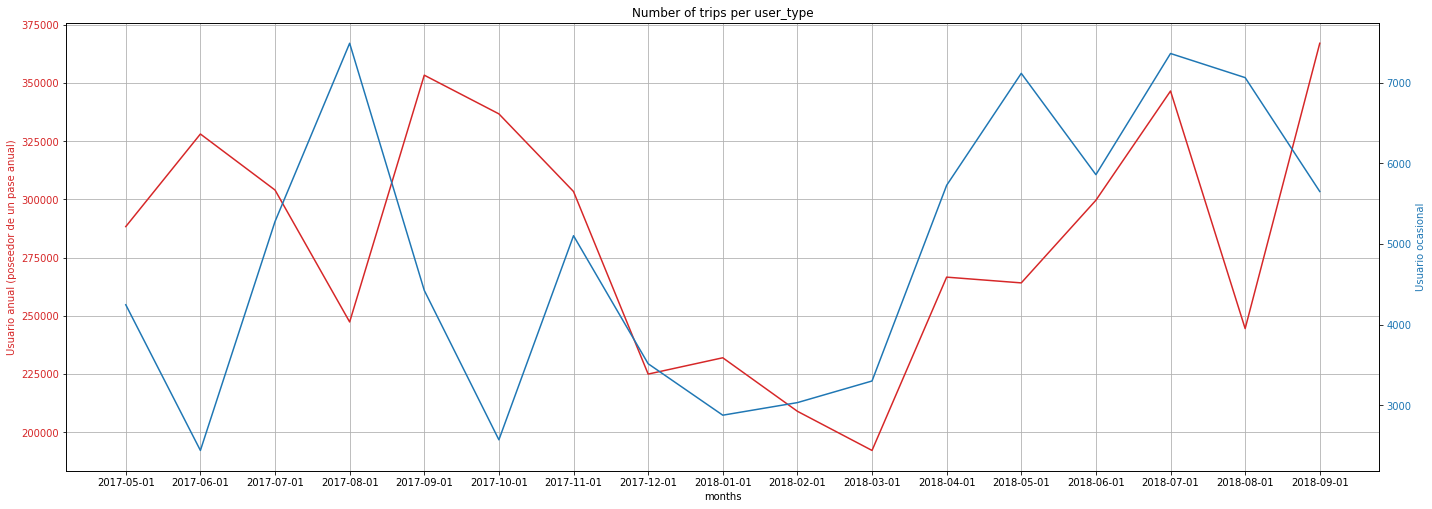

In [18]:
# Graph of number of trips in a month per user_type
data_plot_1=df_trip_stations.loc[df_trip_stations['user_type'] == 1].groupby(['unplug_Month','user_type'])['count'].agg('sum').unstack()
data_plot_2=df_trip_stations.loc[df_trip_stations['user_type'] == 2].groupby(['unplug_Month','user_type'])['count'].agg('sum').unstack()
unplug_Month=df_trip_stations['unplug_Month'].unique()


fig, ax1 = plt.subplots(figsize=(20,7))
color = 'tab:red'
ax1.set_xlabel('months')
ax1.set_ylabel('Usuario anual (poseedor de un pase anual)', color=color)
ax1.plot(unplug_Month, data_plot_1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Usuario ocasional', color=color)  # we already handled the x-label with ax1
ax2.plot(unplug_Month, data_plot_2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Number of trips per user_type', loc='center')

plt.show()





In [19]:
# Trips per day of week per user_type
DayWeek ={0: "Mon",1: "Tue",2: "Wed",3: "Thu",4: "Fri",5: "Sat",6: "Sun"}
df_trips_hourly['unplug_DayOfWeek']=(df_trips_hourly['unplug_Day'].map(lambda x : datetime.date(*map(int, x.split('-'))).weekday())).map(DayWeek)

In [20]:
df_trips_hourly.head()

,unplug_Day,unplug_Hour,user_type,count,unplug_DayOfWeek
0,2017-05-01,1.0,0.0,39.0,Mon
1,2017-05-01,1.0,1.0,126.0,Mon
2,2017-05-01,1.0,3.0,29.0,Mon
3,2017-05-01,2.0,0.0,18.0,Mon
4,2017-05-01,2.0,1.0,109.0,Mon


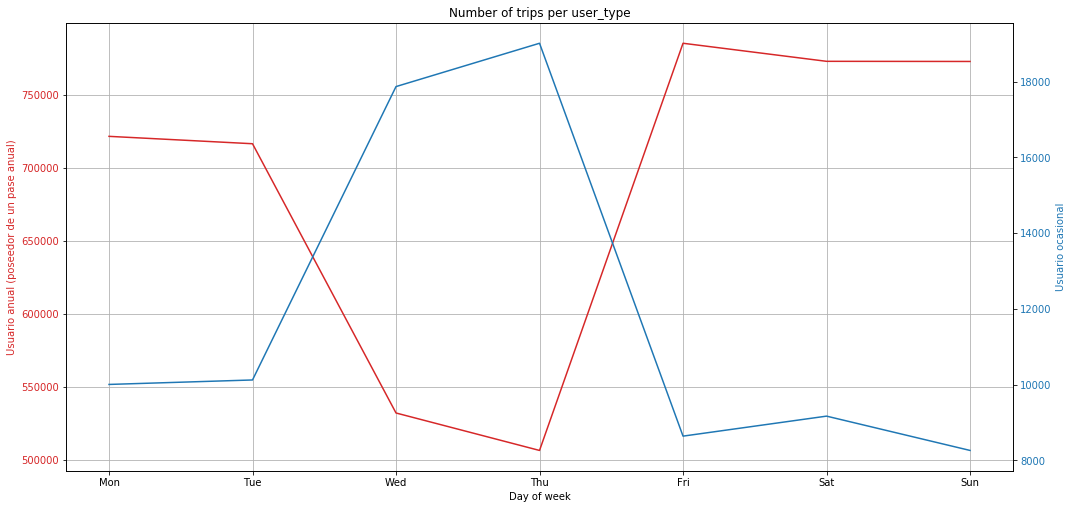

In [21]:
'''
fig, ax = plt.subplots(figsize=(20,7))
width = 0.35 
df_trips_hourly_week=df_trips_hourly.groupby(['unplug_DayOfWeek','user_type'])['count'].agg('sum').unstack()
plt.bar(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], df_trips_hourly_week,width)
'''


df_trips_hourly_week_1=df_trips_hourly.loc[df_trips_hourly['user_type'] == 1].groupby(['unplug_DayOfWeek','user_type'])['count'].agg('sum').unstack()
df_trips_hourly_week_2=df_trips_hourly.loc[df_trips_hourly['user_type'] == 2].groupby(['unplug_DayOfWeek','user_type'])['count'].agg('sum').unstack()
DayW=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
fig, ax1 = plt.subplots(figsize=(15,7))
color = 'tab:red'
ax1.set_xlabel('Day of week')
ax1.set_ylabel('Usuario anual (poseedor de un pase anual)', color=color)
ax1.plot(DayW, df_trips_hourly_week_1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Usuario ocasional', color=color)  # we already handled the x-label with ax1
ax2.plot(DayW, df_trips_hourly_week_2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Number of trips per user_type', loc='center')

plt.show()

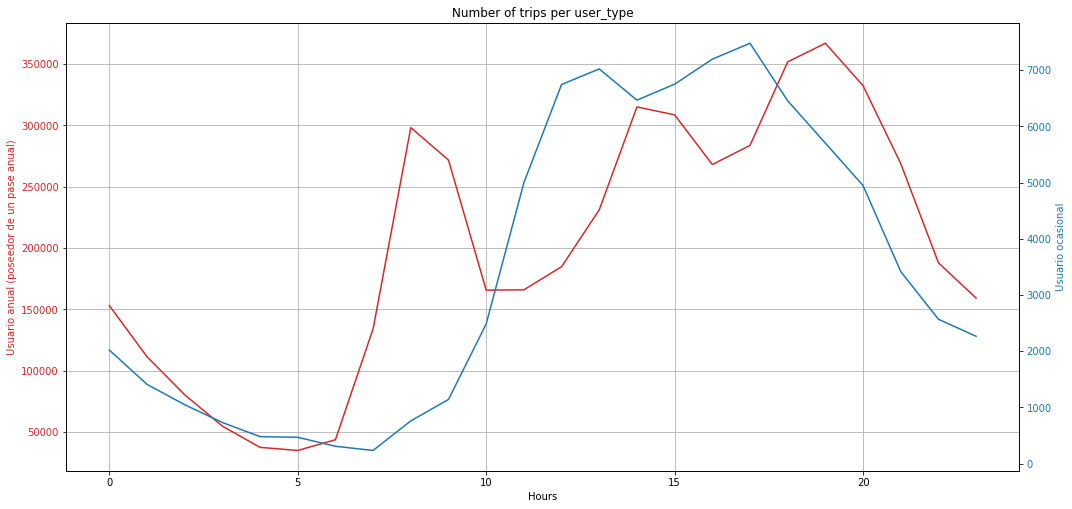

In [22]:
# Trips per hour per user_type
df_trips_hourly_hour_1=df_trips_hourly.loc[df_trips_hourly['user_type'] == 1].groupby(['unplug_Hour','user_type'])['count'].agg('sum').unstack()
df_trips_hourly_hour_2=df_trips_hourly.loc[df_trips_hourly['user_type'] == 2].groupby(['unplug_Hour','user_type'])['count'].agg('sum').unstack()
Hours=np.arange(24)

fig, ax1 = plt.subplots(figsize=(15,7))
color = 'tab:red'
ax1.set_xlabel('Hours')
ax1.set_ylabel('Usuario anual (poseedor de un pase anual)', color=color)
ax1.plot(Hours, df_trips_hourly_hour_1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Usuario ocasional', color=color)  # we already handled the x-label with ax1
ax2.plot(Hours, df_trips_hourly_hour_2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Number of trips per user_type', loc='center')

plt.show()

# Top trips for year (rolling)

In [23]:
# Most famous path for user_type=1
df_trip_stations_year=df_trip_stations[df_trip_stations['user_type'].isin([1,2])].groupby(['idplug_station','idunplug_station','user_type'])['count'].agg('sum').unstack()
df_trip_stations_year.reset_index()
df_trip_stations_year.nlargest(8, 1)


,user_type,1,2
idplug_station,idunplug_station,,
135,135,3152.0,377.0
149,9,2877.0,12.0
135,57,2631.0,17.0
132,132,2584.0,557.0
135,52,2528.0,22.0
90,90,2347.0,272.0
132,135,2343.0,192.0
149,163,2343.0,8.0


In [24]:
# Most famous path for user_type=2
df_trip_stations_year.nlargest(8, 2)

,user_type,1,2
idplug_station,idunplug_station,,
64,64,2264.0,1903.0
132,132,2584.0,557.0
135,135,3152.0,377.0
73,73,940.0,300.0
90,90,2347.0,272.0
86,86,856.0,217.0
73,64,588.0,209.0
135,132,2122.0,209.0


# Analysis: round trip VS a-B trip

In [25]:
# Number of ring trips % (per user_type)
round_trips=df_trip_stations['count'].loc[df_trip_stations['idplug_station']==df_trip_stations['idunplug_station']].groupby(df_trip_stations['user_type']).sum()
total_trips=df_trip_stations['count'].groupby(df_trip_stations['user_type']).sum()
round_trips.div(total_trips)*100

user_type
0     5.336718
1     2.444495
2    10.882962
3    31.754358
Name: count, dtype: float64

In [26]:
# Number of total trips (per user_type)
total_trips

user_type
0      96520
1    4808436
2      83084
3     490128
Name: count, dtype: int64

# Calmap

(<Figure size 1296x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x10ecb0f28>,
       dtype=object))

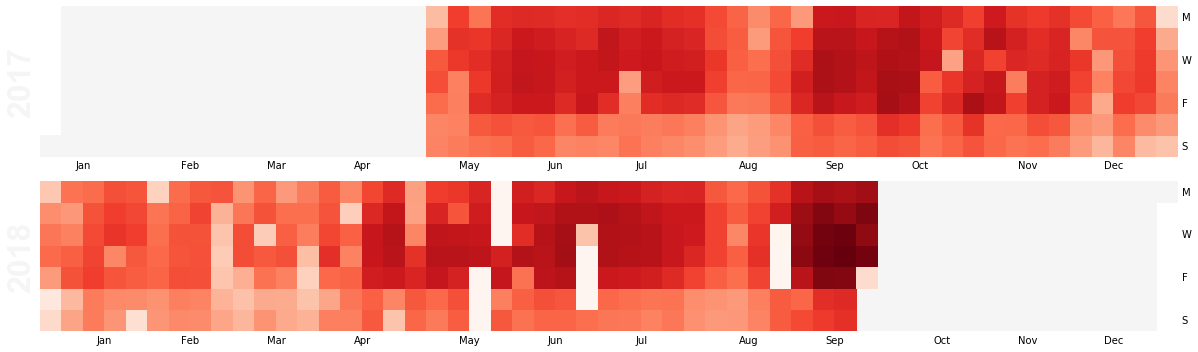

In [27]:
# Create calmap per user_type
import calmap

df_calmap=df_trips_hourly.loc[df_trips_hourly['user_type'] == 1].groupby(['unplug_Day'])['count'].agg('sum')
df_calmap.index = pd.DatetimeIndex(df_calmap.index)
series_calmap = pd.Series(df_calmap,index=df_calmap.index)

calmap.calendarplot(df_calmap, monthticks=1, daylabels='MTWTFSS',dayticks=[0, 2, 4, 6], linewidth=0,fig_kws=dict(figsize=(18, 5)))

(<Figure size 1296x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x10f4143c8>,
       dtype=object))

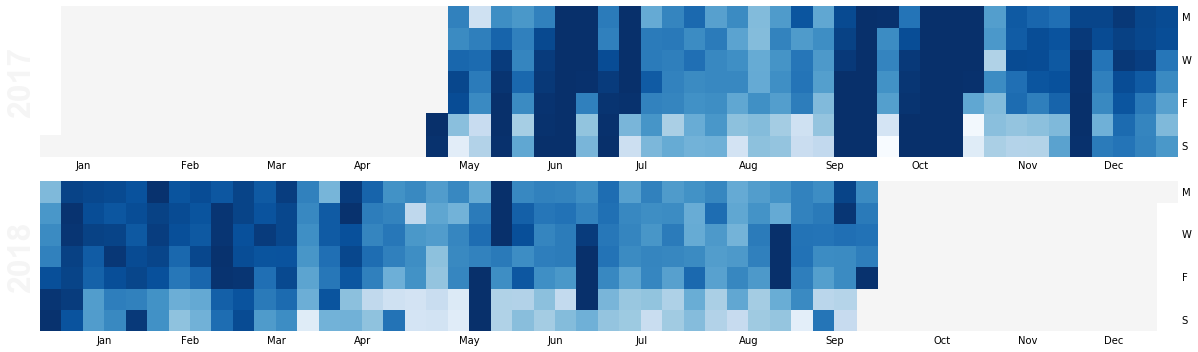

In [28]:
df_calmap=df_trips_hourly.loc[df_trips_hourly['user_type'] == 2].groupby(['unplug_Day'])['count'].agg('sum')
df_calmap.index = pd.DatetimeIndex(df_calmap.index)
series_calmap = pd.Series(df_calmap,index=df_calmap.index)

calmap.calendarplot(df_calmap, monthticks=1, daylabels='MTWTFSS',dayticks=[0, 2, 4, 6],cmap='Blues_r',linewidth=0,fig_kws=dict(figsize=(18, 5)))

(<Figure size 1296x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x111dbcba8>,
       dtype=object))

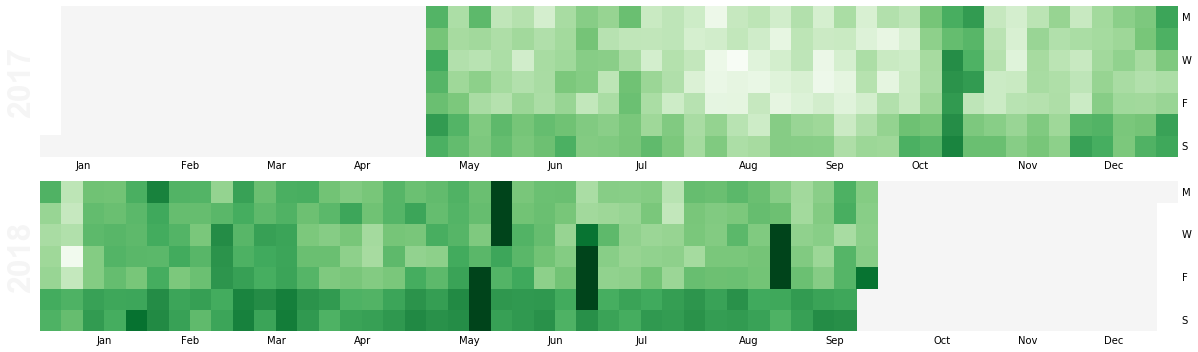

In [29]:
import calmap

df_calmap=df_trips_hourly.loc[df_trips_hourly['user_type'] == 3].groupby(['unplug_Day'])['count'].agg('sum')
df_calmap.index = pd.DatetimeIndex(df_calmap.index)
series_calmap = pd.Series(df_calmap,index=df_calmap.index)

calmap.calendarplot(df_calmap, monthticks=1, daylabels='MTWTFSS',dayticks=[0, 2, 4, 6],cmap='Greens_r', linewidth=0,fig_kws=dict(figsize=(18, 5)))